# Segmented images

The aim of this project is to build a deep neural network capable of analyzing images captured by smartphones to quickly and accurately identify crop diseases.

We are analyzing 54,306 images of plant leaves, which are categorized into 38 class labels. Each class label corresponds to a crop-disease pair, and our goal is to predict this pair from the image of the plant leaf. These images are sourced from the dataset available at the following repository: https://github.com/digitalepidemiologylab/plantvillage_deeplearning_paper_dataset.

To train our AI-based image recognition system, we will utilize this dataset. In all our experiments, we utilize three different versions of the PlantVillage dataset. We begin with the original dataset in color, then we explore a grayscale version, and finally, we conduct our experiments on a version where the leaves are segmented. This approach allows us to assess the performance and robustness of our image recognition system in various contexts. We analyze how variations such as color, grayscale, and leaf segmentation can impact the model’s results. By understanding how our system behaves under these different conditions, we can better evaluate its ability to generalize and operate effectively in real-world environments. These three versions of the data are already available via the above-mentioned link.


The different of crop disease types used in this project :

0: Grape___healthy

1: Peach___Bacterial_spot

2: Apple___healthy

3: Orange___Haunglongbing_(Citrus_greening)

4: Corn_(maize)___healthy

5: Tomato___Septoria_leaf_spot

6: Tomato___healthy

7: Corn_(maize)__Common_rust$

8: Tomato___Early_blight

9: Potato___Late_blight

10: Peach___healthy

11: Corn_(maize)___Northern_Leaf_Blight

12: Blueberry___healthy

13: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)

14: Tomato___Leaf_Mold

15: Soybean___healthy

16: Cherry_(including_sour)___healthy

17: Tomato___Spider_mites Two-spotted_spider_mite

18: Potato___healthy

19: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot

20: Cherry_(including_sour)___Powdery_mildew

21: Apple___Cedar_apple_rust

22: Squash___Powdery_mildew

23: Tomato___Late_blight

24: Grape___Black_rot

25: Pepper,_bell___healthy

26: Tomato___Target_Spot

27: Apple___Black_rot

28: Tomato___Bacterial_spot

29: Strawberry___healthy

30: Pepper,_bell___Bacterial_spot

31: Raspberry___healthy

32: Tomato___Tomato_Yellow_Leaf_Curl_Virus

33: Apple___Apple_scab

34: Potato___Early_blight

35: Tomato___Tomato_mosaic_virus

36: Strawberry___Leaf_scorch

37: Grape___Esca_(Black_Measles)

In [ ]:
import sys
sys.path.append('/content/project/src')

from utils import *
from crop_disease_dataset import *
from model import *
from train import *
from evaluation import *

In [ ]:
repo_url = "https://github.com/digitalepidemiologylab/plantvillage_deeplearning_paper_dataset.git"
clone_dir = "plantvillage_deeplearning_paper_dataset"
extracted_folder = "raw/segmented"

clone_repo(repo_url, clone_dir)
classes = extract_folder(repo_url, clone_dir, extracted_folder)
classes

Folder 'raw/segmented' extracted successfully.
Directory 'Peach___Bacterial_spot' contains 2297 files.
Directory 'Cherry_(including_sour)___Powdery_mildew' contains 1052 files.
Directory 'Tomato___Septoria_leaf_spot' contains 1771 files.
Directory 'Raspberry___healthy' contains 371 files.
Directory 'Grape___healthy' contains 423 files.
Directory 'Peach___healthy' contains 360 files.
Directory 'Tomato___Bacterial_spot' contains 2127 files.
Directory 'Tomato___Target_Spot' contains 1404 files.
Directory 'Potato___Early_blight' contains 1000 files.
Directory 'Strawberry___healthy' contains 456 files.
Directory 'Squash___Powdery_mildew' contains 1835 files.
Directory 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' contains 5357 files.
Directory 'Orange___Haunglongbing_(Citrus_greening)' contains 5507 files.
Directory 'Pepper,_bell___Bacterial_spot' contains 997 files.
Directory 'Soybean___healthy' contains 5090 files.
Directory 'Tomato___healthy' contains 1591 files.
Directory 'Blueberry___health

{'Peach___Bacterial_spot': 2297,
 'Cherry_(including_sour)___Powdery_mildew': 1052,
 'Tomato___Septoria_leaf_spot': 1771,
 'Raspberry___healthy': 371,
 'Grape___healthy': 423,
 'Peach___healthy': 360,
 'Tomato___Bacterial_spot': 2127,
 'Tomato___Target_Spot': 1404,
 'Potato___Early_blight': 1000,
 'Strawberry___healthy': 456,
 'Squash___Powdery_mildew': 1835,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 5357,
 'Orange___Haunglongbing_(Citrus_greening)': 5507,
 'Pepper,_bell___Bacterial_spot': 997,
 'Soybean___healthy': 5090,
 'Tomato___healthy': 1591,
 'Blueberry___healthy': 1502,
 'Apple___Black_rot': 621,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 513,
 'Tomato___Early_blight': 1000,
 'Tomato___Leaf_Mold': 952,
 'Apple___Apple_scab': 630,
 'Grape___Black_rot': 1180,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1076,
 'Apple___Cedar_apple_rust': 275,
 'Corn_(maize)___Common_rust_': 1192,
 'Apple___healthy': 1645,
 'Tomato___Tomato_mosaic_virus': 373,
 'Potato___healthy': 1

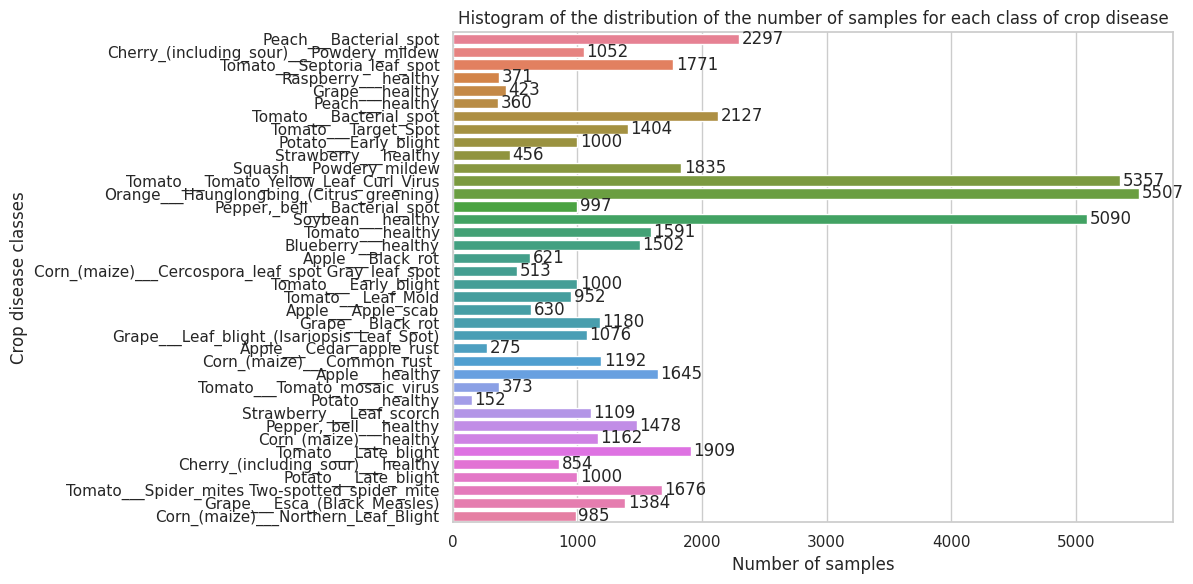

In [ ]:
plot_class_histogram(classes)

In [ ]:
# Spliiting the dataset
train_set = CropDiseaseDataset(root_dir=extracted_folder, train=True, validation=False, gray_scale=False, segmented=True)
validation_set = CropDiseaseDataset(root_dir=extracted_folder, train=False, validation=True, gray_scale=False, segmented=True)
test_set = CropDiseaseDataset(root_dir=extracted_folder, train=False, validation=False, gray_scale=False, segmented=True)

trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
validationloader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False, num_workers=2)

print(f"Train set: '{len(train_set)}' images,", f"Validation set: '{len(validation_set)}' images,", f"Test set: '{len(test_set)}' images")

Train set: '35297' images, Validation set: '8145' images, Test set: '10863' images


In [ ]:
# Define hyperparameters
learning_rate = 1e-3
num_epochs = 20

network = CNN(gray_scale=False).to(device)
network.apply(initialize_parameters)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)

print(f'The model has {count_parameters(network):,} trainable parameters')

The model has 6,846,758 trainable parameters


In [ ]:
# Train the model
train_avg_loss, validation_avg_loss, validation_accuracy, train_accuracy = train(network, num_epochs, trainloader, validationloader, criterion, optimizer,validation_phase=True)

Epoch [1/20], Test Loss: 0.9900, Test Accuracy: 69.05%, Train Loss: 1.1972, Train Accuracy: 63.64%
| Epoch Time: 0m 32s
Epoch [2/20], Test Loss: 0.7375, Test Accuracy: 76.76%, Train Loss: 0.8561, Train Accuracy: 73.02%
| Epoch Time: 0m 32s
Epoch [3/20], Test Loss: 0.5967, Test Accuracy: 80.92%, Train Loss: 0.6932, Train Accuracy: 77.87%
| Epoch Time: 0m 32s
Epoch [4/20], Test Loss: 0.5714, Test Accuracy: 82.14%, Train Loss: 0.5940, Train Accuracy: 80.87%
| Epoch Time: 0m 32s
Epoch [5/20], Test Loss: 0.5521, Test Accuracy: 82.31%, Train Loss: 0.5268, Train Accuracy: 83.15%
| Epoch Time: 0m 34s
Epoch [6/20], Test Loss: 0.4328, Test Accuracy: 85.88%, Train Loss: 0.4694, Train Accuracy: 84.75%
| Epoch Time: 0m 32s
Epoch [7/20], Test Loss: 0.4197, Test Accuracy: 86.54%, Train Loss: 0.4363, Train Accuracy: 85.85%
| Epoch Time: 0m 32s
Epoch [8/20], Test Loss: 0.3818, Test Accuracy: 87.66%, Train Loss: 0.3885, Train Accuracy: 87.04%
| Epoch Time: 0m 32s
Epoch [9/20], Test Loss: 0.3428, Test Ac

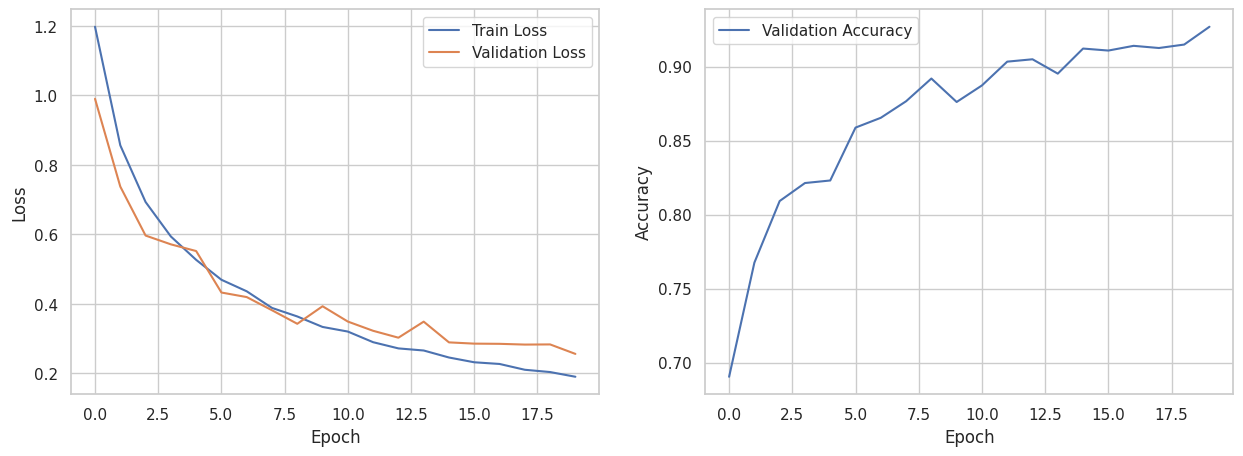

In [ ]:
plot_training_results(train_avg_loss, validation_avg_loss, train_accuracy, validation_accuracy, is_validation=True)

In [ ]:
# Combining train and validation datasets for testing the model
combined_train_set = ConcatDataset([train_set, validation_set])
combined_train_loader = torch.utils.data.DataLoader(combined_train_set, batch_size=64, shuffle=True, num_workers=2)

In [ ]:
# Test the model
network = CNN(gray_scale=False).to(device)
network.apply(initialize_parameters)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)

train_avg_loss, test_avg_loss, test_accuracy, train_accuracy = train(network, num_epochs, combined_train_loader, testloader, criterion, optimizer,validation_phase=False)

Epoch [1/20], Test Loss: 1.4289, Test Accuracy: 57.18%, Train Loss: 2.2526, Train Accuracy: 42.14%
| Epoch Time: 0m 44s
Epoch [2/20], Test Loss: 0.9070, Test Accuracy: 72.13%, Train Loss: 1.1223, Train Accuracy: 66.01%
| Epoch Time: 0m 46s
Epoch [3/20], Test Loss: 0.7356, Test Accuracy: 76.55%, Train Loss: 0.8018, Train Accuracy: 74.96%
| Epoch Time: 0m 43s
Epoch [4/20], Test Loss: 0.5420, Test Accuracy: 82.66%, Train Loss: 0.6476, Train Accuracy: 79.25%
| Epoch Time: 0m 43s
Epoch [5/20], Test Loss: 0.5077, Test Accuracy: 83.39%, Train Loss: 0.5650, Train Accuracy: 82.03%
| Epoch Time: 0m 43s
Epoch [6/20], Test Loss: 0.4882, Test Accuracy: 84.18%, Train Loss: 0.5055, Train Accuracy: 83.73%
| Epoch Time: 0m 43s
Epoch [7/20], Test Loss: 0.4627, Test Accuracy: 85.14%, Train Loss: 0.4551, Train Accuracy: 85.17%
| Epoch Time: 0m 46s
Epoch [8/20], Test Loss: 0.4756, Test Accuracy: 84.61%, Train Loss: 0.4206, Train Accuracy: 86.40%
| Epoch Time: 0m 41s
Epoch [9/20], Test Loss: 0.4370, Test Ac

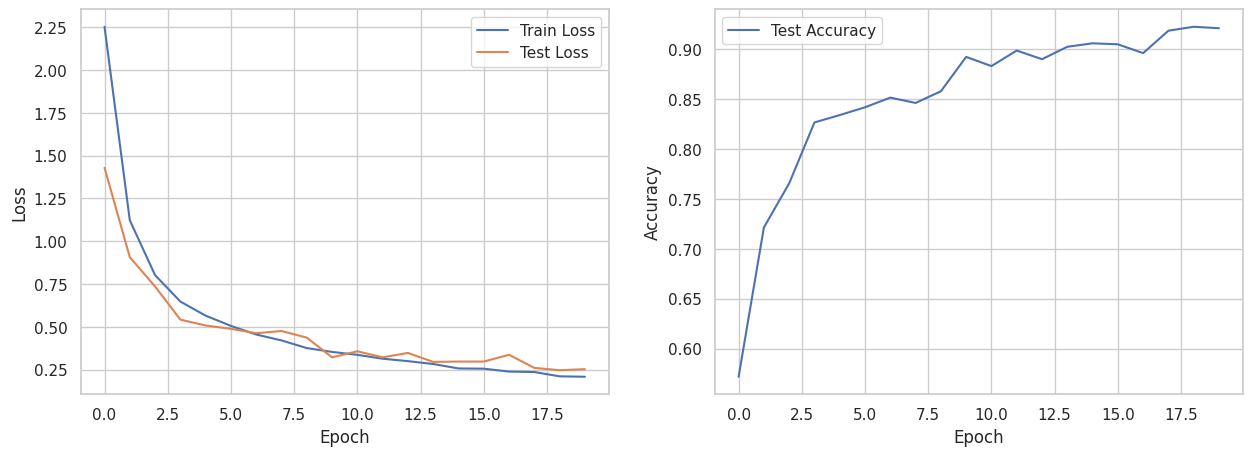

In [ ]:
plot_training_results(train_avg_loss, test_avg_loss, train_accuracy, test_accuracy, is_validation=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
network.load_state_dict(torch.load('model.pt'))
images, labels, probs, corrects = get_predictions(network, testloader, device)
pred_labels = torch.argmax(probs, 1)

print(f"There are {len(corrects)} correct predictions.")

There are 10863 correct predictions.


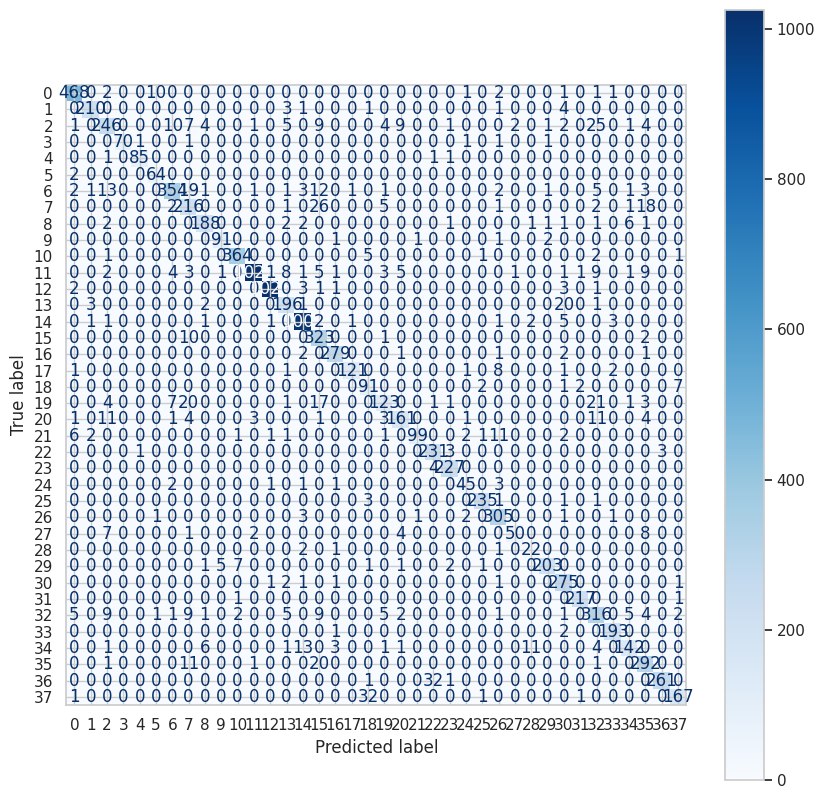

In [ ]:
plot_confusion_matrix(labels, pred_labels)

In [ ]:
# Now, extract and sort incorrect examples
incorrect_examples = []
for image, label, prob, correct in zip(images, labels, probs, corrects):
    if not correct:
        incorrect_examples.append((image, label, prob))

incorrect_examples.sort(reverse=True, key=lambda x: torch.max(x[2], dim=0).values)
print(f"There are {len(incorrect_examples)} incorrect predictions.")

There are 878 incorrect predictions.


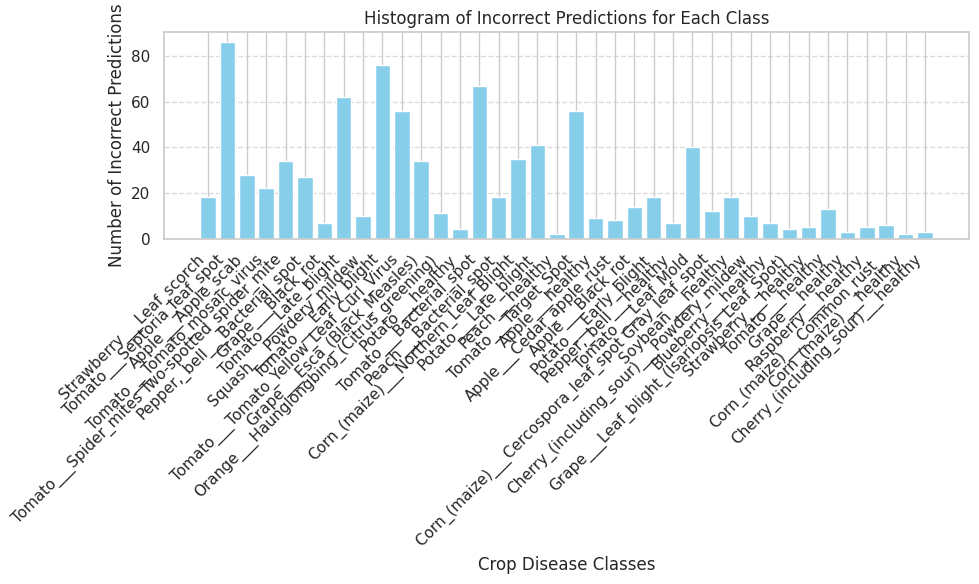

In [ ]:
incorrect_counts = count_incorrect_predictions(incorrect_examples)
class_names = [train_set.classes[label] for label in incorrect_counts.keys()]
plot_incorrect_predictions_histogram(incorrect_counts, class_names)

In [ ]:
data = {'Class Name': class_names, 'Incorrect Counts': list(incorrect_counts.values())}
df1 = pd.DataFrame(data)
df1 = df1.sort_values(by='Class Name')

In [ ]:
class_counts = defaultdict(int)

for images, labels in testloader:
    for label in labels:
        class_counts[label.item()] += 1

class_names_dict = {label: train_set.classes[label] for label in class_counts.keys()}
class_counts_named = {class_names_dict[label]: count for label, count in class_counts.items()}

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


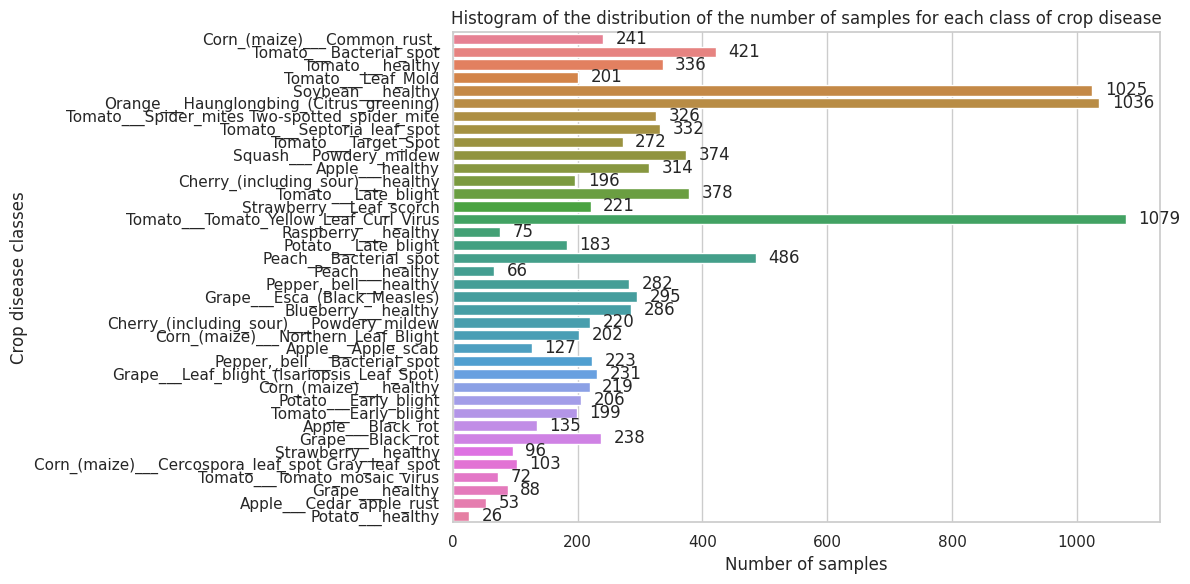

In [ ]:
plot_class_histogram(class_counts_named)

In [ ]:
class_counts_named = {class_names_dict[label]: count for label, count in class_counts.items()}

df2 = pd.DataFrame(list(class_counts_named.items()), columns=['Class Name', 'Counts'])
df2 = df2.sort_values(by='Class Name')

In [ ]:
merged_df = pd.merge(df1, df2, on='Class Name', suffixes=('_incorrect', '_test'))
# Calculate the rate of success for each class in percentage
merged_df['Success Rate (%)'] = ((merged_df['Counts'] - merged_df['Incorrect Counts']) / merged_df['Counts']) * 100
merged_df = merged_df.sort_values(by='Class Name')
merged_df

,Class Name,Incorrect Counts,Counts,Success Rate (%)
0,Apple___Apple_scab,28,127,77.952756
1,Apple___Black_rot,14,135,89.629630
2,Apple___Cedar_apple_rust,8,53,84.905660
3,Apple___healthy,9,314,97.133758
4,Blueberry___healthy,7,286,97.552448
5,Cherry_(including_sour)___Powdery_mildew,10,220,95.454545
6,Cherry_(including_sour)___healthy,3,196,98.469388
7,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,12,103,88.349515
8,Corn_(maize)___Common_rust_,6,241,97.510373
9,Corn_(maize)___Northern_Leaf_Blight,35,202,82.673267


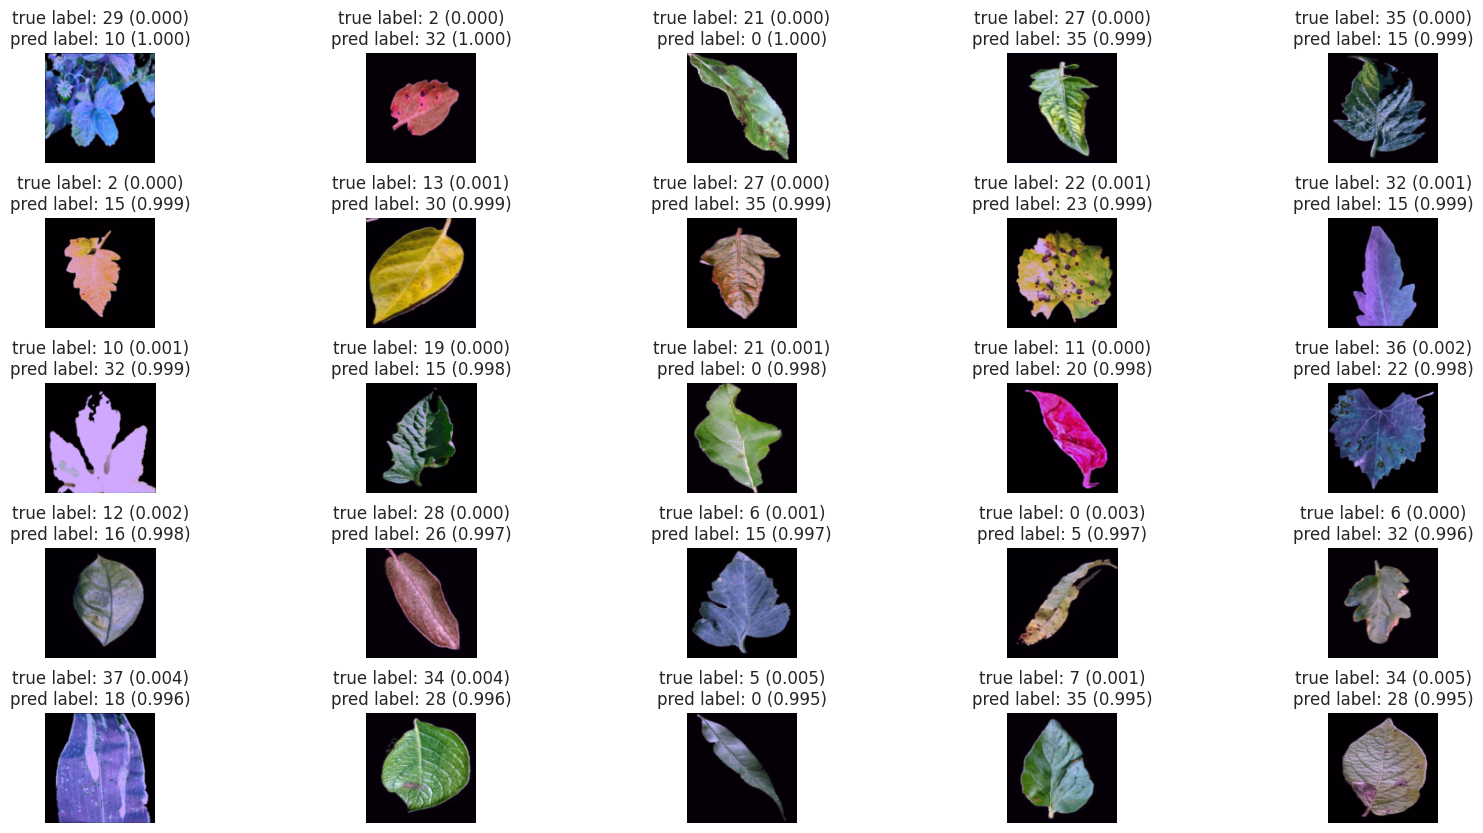

In [ ]:
N_IMAGES = 25
plot_most_incorrect(incorrect_examples, N_IMAGES)